In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.insert(0, '..')

%matplotlib inline
sns.set()

In [2]:
import glob

In [3]:
no_kaf = "../logs/darnn/ntsa-2019-01-03-11-06-36"
kaf_time = "../logs/darnn/ntsa-2019-01-03-11-06-56"
kaf_input = "../logs/darnn/ntsa-2019-01-03-11-07-30"
kaf_dual = "../logs/darnn/ntsa-2019-01-03-11-07-51"

In [4]:
df_no_kaf = pd.read_csv(no_kaf + '/train/results.csv')
df_kaf_time = pd.read_csv(kaf_time + '/train/results.csv')
df_kaf_input = pd.read_csv(kaf_input + '/train/results.csv')
df_kaf_dual = pd.read_csv(kaf_dual + '/train/results.csv')

In [5]:
def smooth(x,w=0.5):
    p = x[0]
    xs = []
    for d in x:
        p = p * w + (1-w) * d
        xs.append(p)
    return np.array(xs)

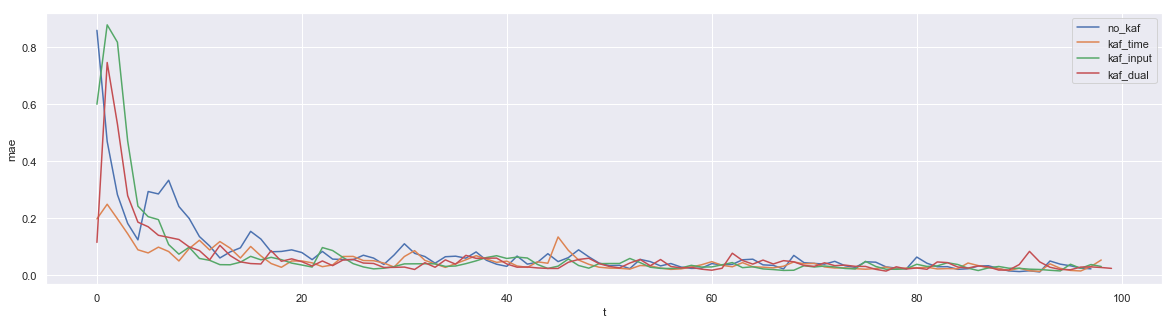

In [6]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(smooth(df_no_kaf.loss.values))
ax.plot(smooth(df_kaf_time.loss.values))
ax.plot(smooth(df_kaf_input.loss.values))
ax.plot(smooth(df_kaf_dual.loss.values))
plt.ylabel('mae')
plt.xlabel('t')
plt.legend(['no_kaf','kaf_time','kaf_input', 'kaf_dual'])

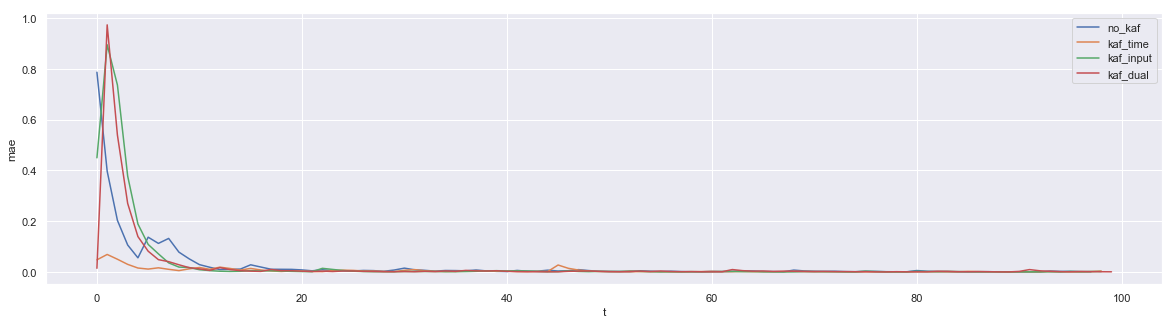

In [7]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(smooth(df_no_kaf.mse.values))
ax.plot(smooth(df_kaf_time.mse.values))
ax.plot(smooth(df_kaf_input.mse.values))
ax.plot(smooth(df_kaf_dual.mse.values))
plt.ylabel('mae')
plt.xlabel('t')
plt.legend(['no_kaf','kaf_time','kaf_input', 'kaf_dual'])

In [8]:

rows = ['no_kaf','kaf_time','kaf_input', 'kaf_dual']

table = pd.concat([df_no_kaf.mean(axis=0), df_kaf_time.mean(axis=0), df_kaf_input.mean(axis=0), df_kaf_dual.mean(axis=0)], axis=1)
table.columns = rows

table.T

,loss,norm,mse,mae,smape,rmse,mape
no_kaf,0.070269,7.572442,0.017479,0.070269,0.115842,0.070269,33.552947
kaf_time,0.048278,6.861487,0.005476,0.048278,0.080595,0.048278,49.637450
kaf_input,0.064055,8.077081,0.026881,0.064055,0.092800,0.064055,127.198716
kaf_dual,0.059547,7.895635,0.024065,0.059547,0.077643,0.059547,34.255714


In [9]:
header = table.index.tolist()

In [10]:
df_no_kaf = pd.read_csv(no_kaf + '/test/results.csv', names=header)
df_kaf_time = pd.read_csv(kaf_time + '/test/results.csv', names=header)
df_kaf_input = pd.read_csv(kaf_input + '/test/results.csv', names=header)
df_kaf_dual = pd.read_csv(kaf_dual+ '/test/results.csv', names=header)

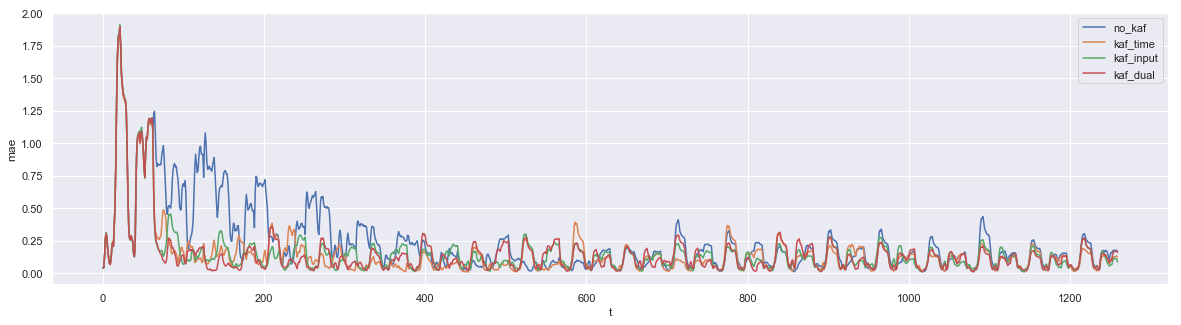

In [11]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(smooth(df_no_kaf.loss.values))
ax.plot(smooth(df_kaf_time.loss.values))
ax.plot(smooth(df_kaf_input.loss.values))
ax.plot(smooth(df_kaf_dual.loss.values))
plt.ylabel('mae')
plt.xlabel('t')
plt.legend(['no_kaf','kaf_time','kaf_input', 'kaf_dual'])

In [12]:
table = pd.concat([df_no_kaf.mean(axis=0), df_kaf_time.mean(axis=0), df_kaf_input.mean(axis=0), df_kaf_dual.mean(axis=0)], axis=1)
table.columns = rows

In [13]:
table.T

,loss,norm,mse,mae,smape,rmse,mape
no_kaf,0.235725,8.746710,0.136178,0.235725,0.345367,0.235725,291.570660
kaf_time,0.146434,8.103555,0.070542,0.146434,0.199031,0.146434,90.424486
kaf_input,0.152648,9.606431,0.072437,0.152648,0.203494,0.152648,74.639587
kaf_dual,0.146941,9.563575,0.070644,0.146941,0.192655,0.146941,55.742197


In [14]:
def last_path(base_path):
    paths = glob.glob(base_path + '/report/*.csv')
    idxs = list(map(lambda x: int(x.split('/')[-1].split('_')[0]), paths))
    idx = max(idxs)
    paths
    return base_path + '/report/' + ''.join([str(idx), '_', 'report.csv'])

In [15]:
df_no_kaf = pd.read_csv(last_path(no_kaf), index_col=0)
df_kaf_time = pd.read_csv(last_path(kaf_time), index_col=0)
df_kaf_input = pd.read_csv(last_path(kaf_input), index_col=0)
df_kaf_dual = pd.read_csv(last_path(kaf_dual), index_col=0)

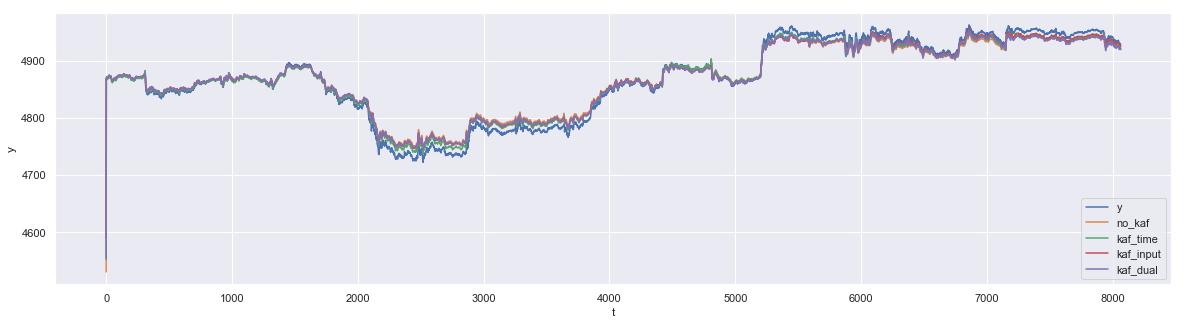

In [16]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(df_no_kaf.y.values)
ax.plot(df_no_kaf.y_hat.values)
ax.plot(df_kaf_time.y_hat.values)
ax.plot(df_kaf_input.y_hat.values)
ax.plot(df_kaf_dual.y_hat.values)
plt.ylabel('y')
plt.xlabel('t')
plt.legend(['y','no_kaf','kaf_time','kaf_input', 'kaf_dual'])

In [17]:
from ntsa.utils.misc import regr_metrics

In [18]:
y = df_no_kaf.y.values
y_no_kaf = df_no_kaf.y_hat.values
y_kaf_time = df_kaf_time.y_hat.values
y_kaf_input = df_kaf_input.y_hat.values
y_kaf_dual = df_kaf_dual.y_hat.values

In [19]:
metrics = [
list(regr_metrics(y, y_no_kaf).values()),
list(regr_metrics(y, y_kaf_time).values()),
list(regr_metrics(y, y_kaf_input).values()),
list(regr_metrics(y, y_kaf_dual).values())
]

In [20]:
pd.DataFrame(np.array(metrics), index=['no_kaf', 'time', 'input', 'dual'], columns=['mse', 'mae', 'smape', 'mape'])

,mse,mae,smape,mape
no_kaf,136.609158,9.083941,0.001872,0.187171
time,72.079339,6.540246,0.001347,0.134684
input,91.528097,7.287457,0.001504,0.150389
dual,105.593962,7.972155,0.001643,0.164284
